# Develoaping a neural network from scratch 

In [217]:
# Here IN this part we will develoap a two layered neural network 


# imports 
from IPython.display import Image 
import numpy as np 


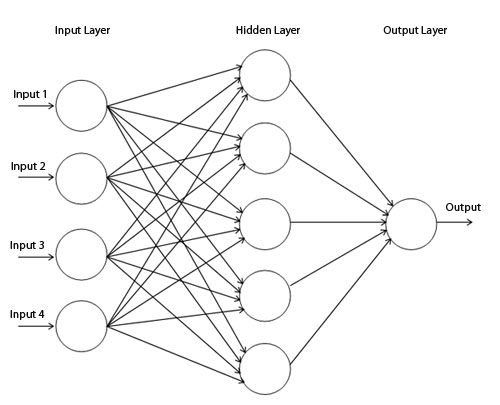

In [218]:
Image(filename = "/home/vivek/vivekm/Neural_Networks/NNstr.jpg" ,  width = 500 ,height =  600)

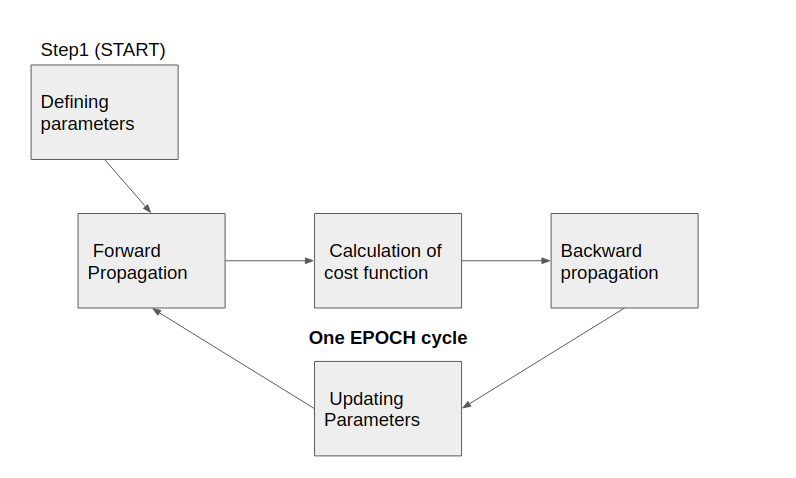

In [219]:
# we will proceed step step by step 

Image(filename = "/home/vivek/vivekm/Neural_Networks/viv111.png" ,  width = 700 ,height =  600)


# Step 1  : Defining Parameters 

In [85]:
# Neural Network Architure 

nn_arch = [
    {"input_dim": 4, "output_dim": 5, "activation": "relu"}, # for first layer 
    {"input_dim": 5, "output_dim": 1, "activation": "sigmoid"} # For seceond layer 
    ]



In [86]:
# initializing layers


#Definfing the weight metrices and bias 

# weight metrices dims = (No of hidden units in the current layers , No of hidden units in the privious layers )


# weight metrices for layer 1 : W1(5,4)
# weight metrices for layer 2 : W1(1,5)
# bias for layer 1 : b(5,1)
# bias for layer 2 : b(1,1)



def init_layers(nn_arch):
    np.random.seed(99)
    number_of_layers = len(nn_arch)
    parameters  = {}

    for index, layer in enumerate(nn_arch):
        index = index + 1
        input_size = layer["input_dim"]
        output_size = layer["output_dim"]
        
        parameters['W' + str(index)] = np.random.randn(output_size, input_size) * 0.1
        
        parameters['b' + str(index)] = np.random.randn(output_size, 1) * 0.1 
        # Here Random  initialize for bias is not  much importent we can diretly initialize it with zeros 
        
    return  parameters


init_layers(nn_arch)


{'W1': array([[-0.01423588,  0.20572217,  0.02832619,  0.1329812 ],
        [-0.01546219, -0.00690309,  0.07551805,  0.08256466],
        [-0.01130692, -0.23678376, -0.01670494,  0.0685398 ],
        [ 0.00235001,  0.04562013,  0.02704928, -0.14350081],
        [ 0.08828171, -0.05800817, -0.05015653,  0.05909533]]),
 'b1': array([[-0.07316163],
        [ 0.02617555],
        [-0.08557956],
        [-0.01875259],
        [-0.03734863]]),
 'W2': array([[-0.0461971 , -0.08164661, -0.00451233,  0.01213278,  0.09259528]]),
 'b2': array([[-0.05738197]])}

In [215]:
# Activations 


def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_back(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_back(dA, Z): # A step function 
    dZ = np.array(dA, copy = True) 
    dZ[Z <= 0] = 0;
    return dZ;
 

# Step2 : Forward propagation

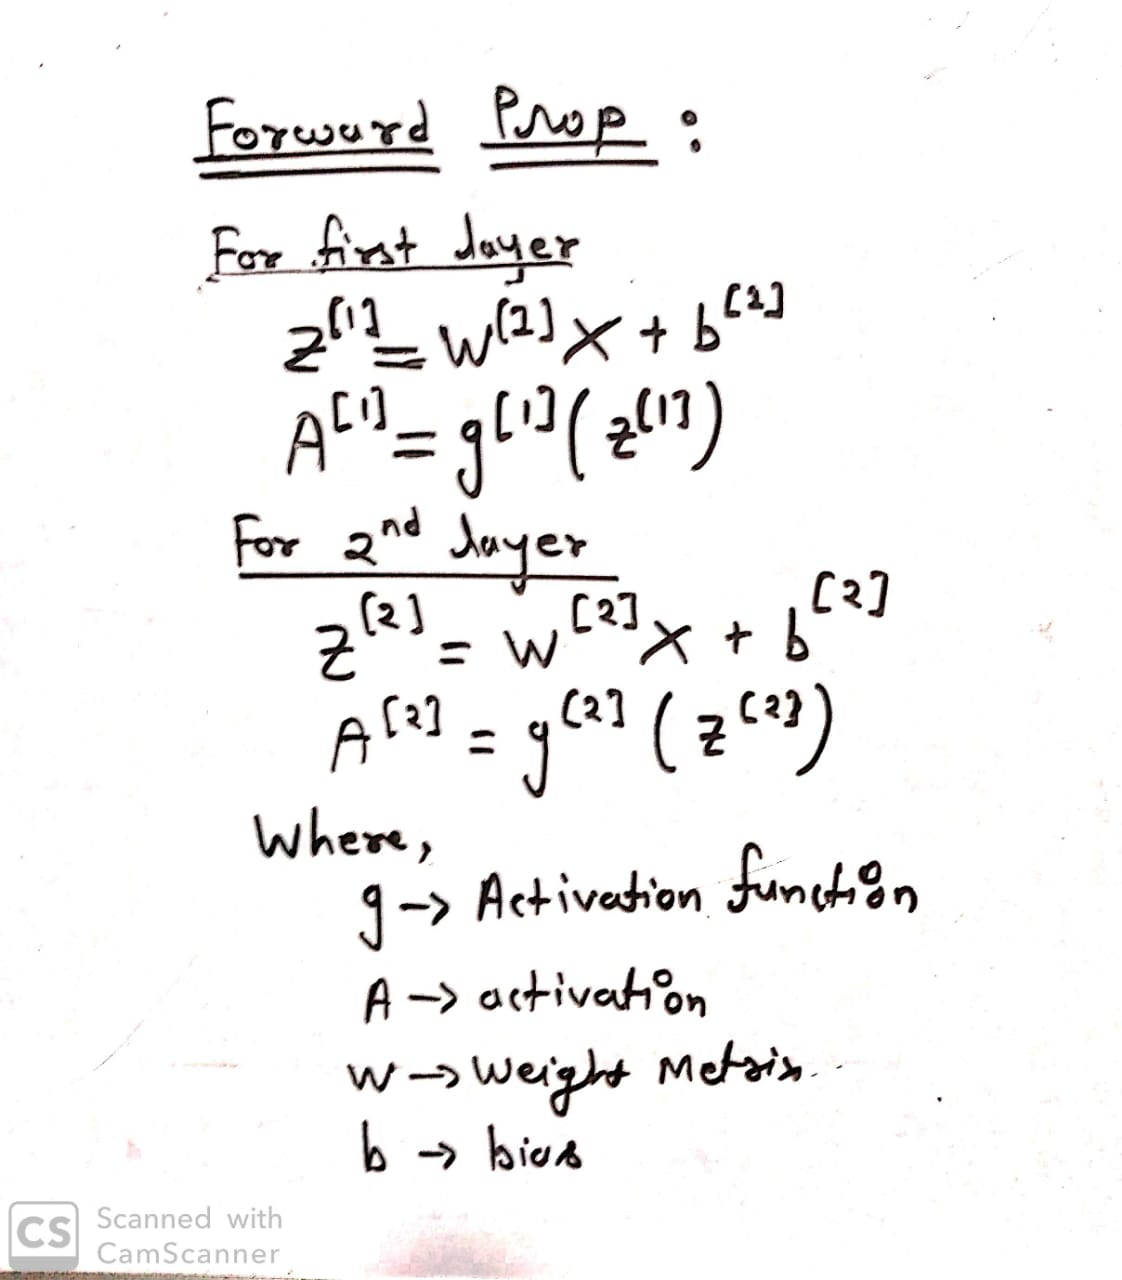

In [209]:
Image(filename = "/home/vivek/vivekm/Neural_Networks/viv11.jpeg" ,  width = 500 ,height =  600)

In [105]:

def single_layer_forward_prop(A_prev, W_curr, b_curr, activation="relu"):
    #b_curr = np.asarray(b_curr)#keepdims = True
    Z_curr = np.dot(W_curr, A_prev) + b_curr
    
    if activation is "relu":
        activation_func = relu
    elif activation is "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('given activation function is not supported / not Defined ')
        
    return activation_func(Z_curr), Z_curr

In [149]:

def forward_prop(X, parameters, nn_arch):
    cache = {}
    A_curr = X
    
    for index, layer in enumerate(nn_arch):
        l_index = index + 1
        A_prev = A_curr
        
        curr_activ_function = layer["activation"]
        W_curr = parameters["W" + str(l_index)]
        b_curr = parameters["b" + str(l_index)]
        A_curr, Z_curr = single_layer_forward_prop(A_prev, W_curr, b_curr, curr_activ_function)
        
        cache["A" + str(index)] = A_prev
        cache["Z" + str(l_index)] = Z_curr
       
    return A_curr, cache

# Step 3  : Loss function

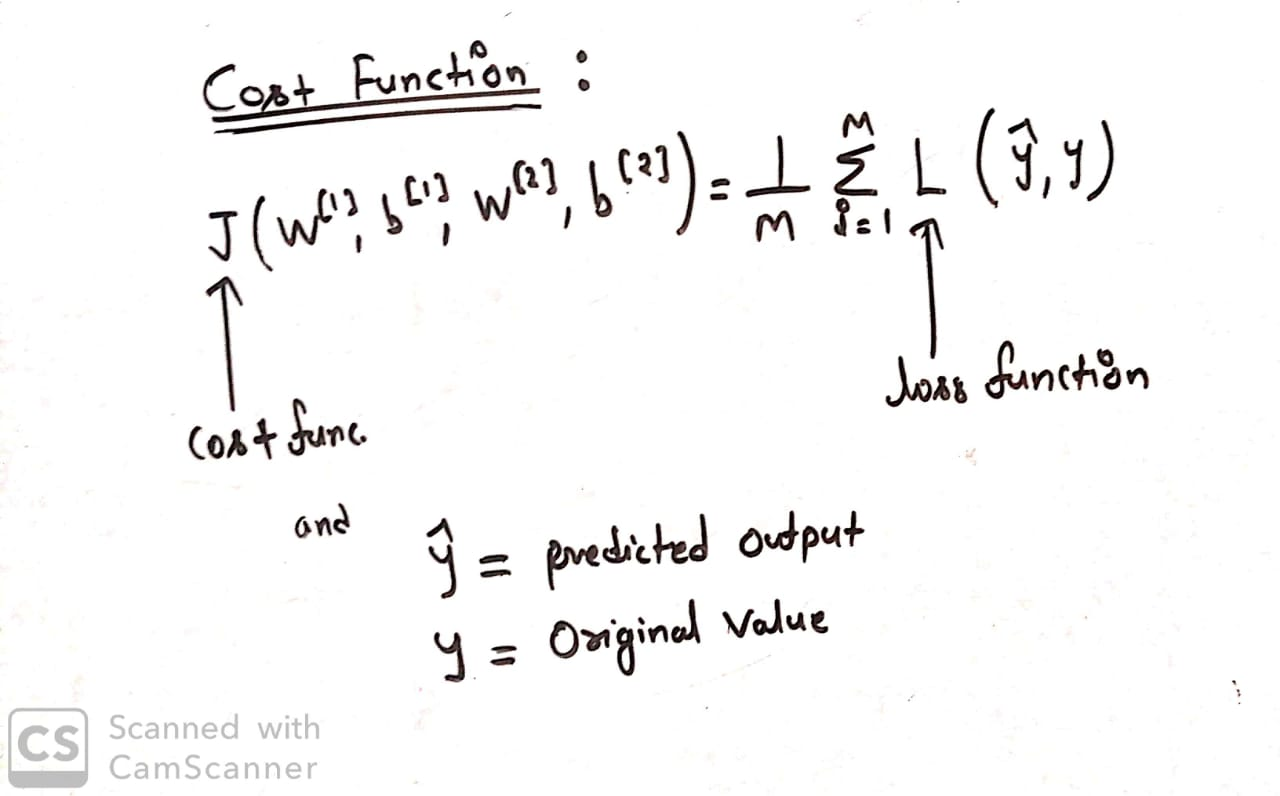

In [210]:
Image(filename = "/home/vivek/vivekm/Neural_Networks/viv12.jpeg" ,  width = 500 ,height =  600)

In [160]:
def convert_prob_into_class(Y_hat):
    
    return (Y_hat < 0.5).astype(np.int)
    
    
'''
for binary classification :

probas = np.array([[0.4],[0.7],[0.2]])
labels = (probas < 0.5).astype(np.int)
print(labels)
[[1]
 [0]
 [1]]
 
for multiclass :

probas = np.array([[0.4, 0.1, 0.5],[0.7, 0.2, 0.1],[0.3, 0.4, 0.3]])
labels = np.argmax(probas, axis=-1)    
print(labels)
[2 0 1]


And to get these as one-hot encoded arrays you can use:

lb = preprocessing.LabelBinarizer()
lb.fit_transform(labels)
array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])
'''
def get_cost_value(Y_hat, Y):
    m = Y_hat.shape[1]
    cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
    return np.squeeze(cost)

def get_accuracy_value(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()


# Step4 : Backward propagation


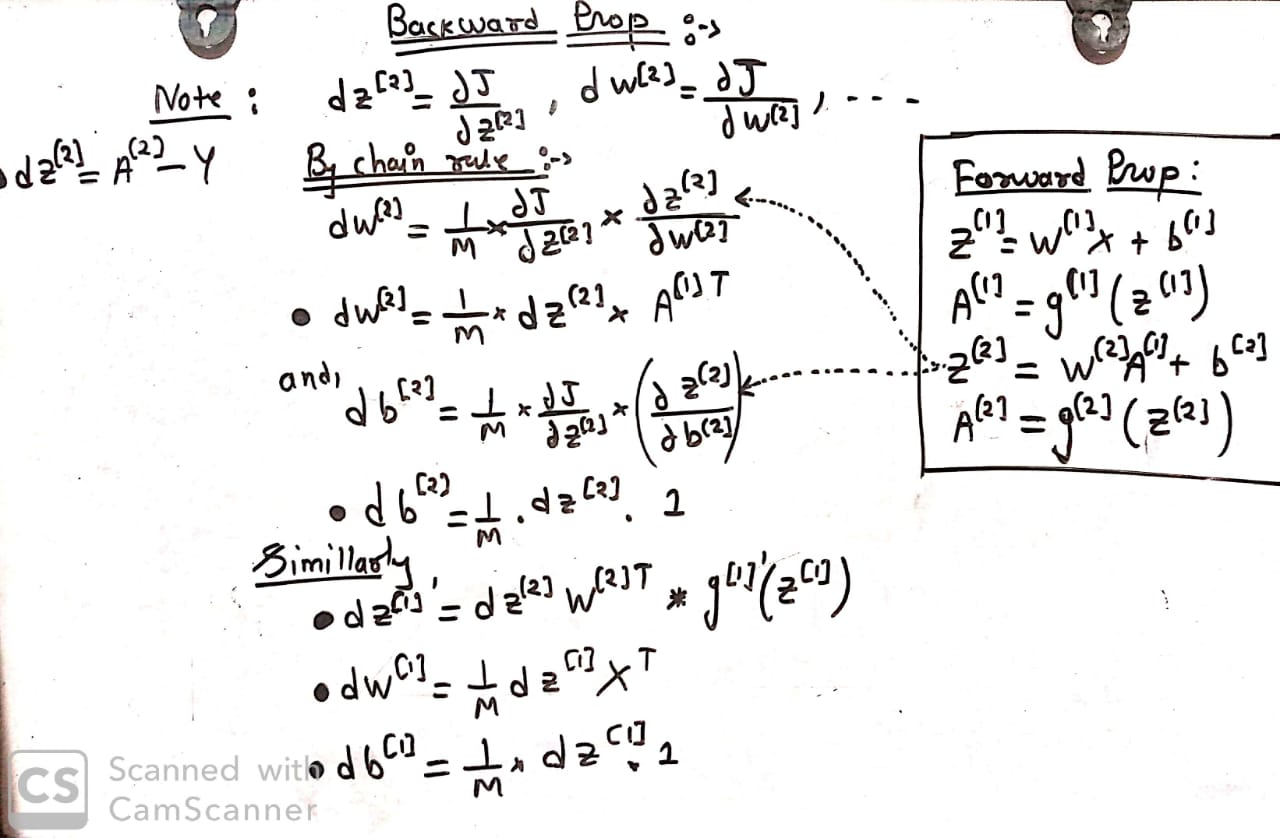

In [212]:
Image(filename = "/home/vivek/vivekm/Neural_Networks/viv13.jpeg" ,  width = 800 ,height =  600)

In [161]:
def single_layer_backward_prop(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    m = A_prev.shape[1]
    
    if activation is "relu":
        backward_activation_func = relu_back
    elif activation is "sigmoid":
        backward_activation_func = sigmoid_back
    else:
        raise Exception('given activation function is not supported /  not Defined ')
    
    dZ_curr = backward_activation_func(dA_curr, Z_curr)
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m  # here we are adding the values along the axis 1 , and keepdims = True to avoid the problem of rank 1 array 
    dA_prev = np.dot(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

In [188]:
def backward_prop(Y_hat, Y, cache, parameters, nn_arch):
    grads_values = {}
    m = Y.shape[1]
    Y = Y.reshape(Y_hat.shape)
   
    dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    
    for l_index_prev, layer in reversed(list(enumerate(nn_arch))):
        l_index_curr = l_index_prev + 1
        
        curr_activ_function= layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = cache["A" + str(l_index_prev)]
        Z_curr = cache["Z" + str(l_index_curr)]
        W_curr = parameters["W" + str(l_index_curr)]
        b_curr = parameters["b" + str(l_index_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_prop(
            dA_curr, W_curr, b_curr, Z_curr, A_prev, curr_activ_function)
        
        grads_values["dW" + str(l_index_curr)] = dW_curr
        grads_values["db" + str(l_index_curr)] = db_curr
    
    return grads_values

# Step5 : Updating parameters  / gradient descent 

In [201]:
def update(parameters, grads_values, nn_arch, learning_rate):
    
    for l_index, layer in enumerate(nn_arch):
        l_index = l_index +1
        parameters["W" + str(l_index)] -= learning_rate * grads_values["dW" + str(l_index)]        
        parameters["b" + str(l_index)] -= learning_rate * grads_values["db" + str(l_index)]

    return parameters;

# Step6 : Combining all steps together 

In [193]:
def train(X, Y, nn_arch, epochs, learning_rate):
    parameters = init_layers(nn_arch)
    cost_history = []
    accuracy_history = []
    
    for i in range(epochs):
        Y_hat, cashe = forward_prop(X, parameters, nn_arch)
        cost = get_cost_value(Y_hat, Y)
        cost_history.append(cost)
        accuracy = get_accuracy_value(Y_hat, Y)
        accuracy_history.append(accuracy)
        
        grads_values = backward_prop(Y_hat, Y, cashe, parameters, nn_arch)
        parameters = update(parameters, grads_values, nn_arch, learning_rate)
        
    return parameters, cost_history, accuracy_history

# finally our neural net is ready let's start training

In [196]:
# Generating random dataset 

X = np.random.randn(4,1000)
Y = np.random.randn(1,1000)




In [220]:
epochs = 10
lr = 0.001

parameters, cost_history, accuracy_history = train(X, Y, nn_arch, epochs,lr)

In [203]:
print(cost_history)

[array(0.66231224), array(0.66206644), array(0.66182075), array(0.66157519), array(0.66132976), array(0.66108445), array(0.66083926), array(0.6605942), array(0.66034927), array(0.66010445)]


In [204]:
print(accuracy_history )

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [221]:
print(parameters)

{'W1': array([[-0.01423403,  0.20579342,  0.02834685,  0.13302342],
       [-0.01550545, -0.00692005,  0.0756263 ,  0.08268854],
       [-0.01130783, -0.23679237, -0.01670425,  0.06854309],
       [ 0.00235013,  0.04561216,  0.0270417 , -0.14347687],
       [ 0.08817071, -0.05793177, -0.05010377,  0.05901245]]), 'b1': array([[-0.07307281],
       [ 0.02642593],
       [-0.0855709 ],
       [-0.01877978],
       [-0.0375107 ]]), 'W2': array([[-0.04650655, -0.08196185, -0.00483885,  0.01184165,  0.09242561]]), 'b2': array([[-0.06227582]])}
